In [1]:
# Generate a 1-minute sine wave at 44100 Hz, 16-bit PCM
import numpy as np
from scipy.io.wavfile import write as wavFileWriter

# Parameters
sample_rate = 44100  # Hz
duration = 60  # seconds
frequency = 440.0  # Hz 
amplitude = 32767  # Max amplitude for 16-bit audio

# Generate time values
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

# Generate sine wave
sine_wave = (amplitude * np.sin(2 * np.pi * frequency * t)).astype(np.int16)

# Write to WAV file
wavFileWriter("Data/sine_wave_44100Hz_16bit_1min.wav", sample_rate, sine_wave)

print("Sine wave file generated: sine_wave_44100Hz_16bit_1min.wav")

Sine wave file generated: sine_wave_44100Hz_16bit_1min.wav


In [ ]:
# Use librosa for time stretching and pitch shifting
import librosa

# Convert sine wave to floating-point format
sine_wave_float = sine_wave.astype(np.float32) / 32767  # Normalize to range [-1, 1]

# Apply time stretching wihtout changing pitch
stretch_factor = 1.5  # Stretch by 1.5x (slower)
y_stretched = librosa.effects.time_stretch(sine_wave_float, rate=stretch_factor)

# Save the stretched audio
from scipy.io.wavfile import write as wavFileWriter
wavFileWriter("Data/sine_wave_stretched.wav", sample_rate, (y_stretched * 32767).astype(np.int16))


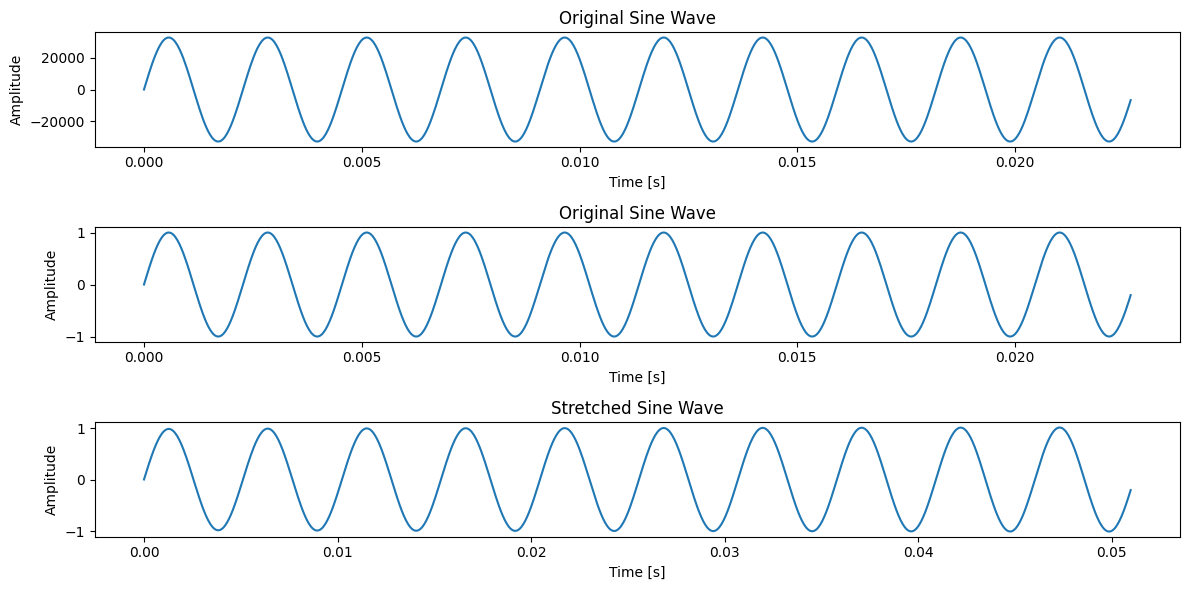

In [7]:
# Plot the original and stretched sine waves
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)    
plt.plot(t[:1000], sine_wave[:1000])
plt.title("Original Sine Wave")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.subplot(3, 1, 2)    
plt.plot(t[:1000], sine_wave_float[:1000])
plt.title("Original Sine Wave")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.subplot(3, 1, 3)
plt.plot(np.linspace(0, duration * stretch_factor, len(y_stretched))[:1000], y_stretched[:1000])
plt.title("Stretched Sine Wave")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()


In [ ]:
# Apply pitch shifting wihtout changing speed
n_steps = 2  # Number of semitones to shift (positive for up, negative for down)
sine_wave_shifted = librosa.effects.pitch_shift(sine_wave_float, sr=sample_rate, n_steps=n_steps)

# Save the pitch-shifted audio
wavFileWriter("Data/sine_wave_pitch_shifted.wav", sample_rate, (sine_wave_shifted * 32767).astype(np.int16))

print("Pitch-shifted audio saved as: sine_wave_pitch_shifted.wav")

Pitch-shifted audio saved as: sine_wave_pitch_shifted.wav


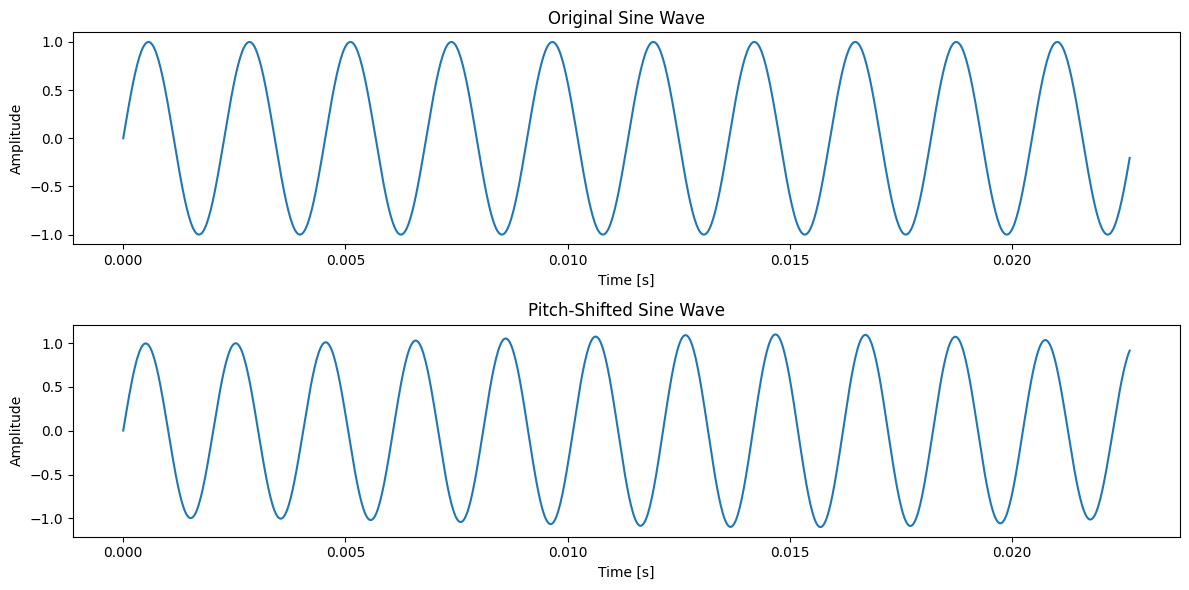

In [9]:
# Plot the original and stretched sine waves
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t[:1000], sine_wave_float[:1000])
plt.title("Original Sine Wave")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.subplot(2, 1, 2)
plt.plot(np.linspace(0, duration, len(sine_wave_shifted))[:1000], sine_wave_shifted[:1000])
plt.title("Pitch-Shifted Sine Wave")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

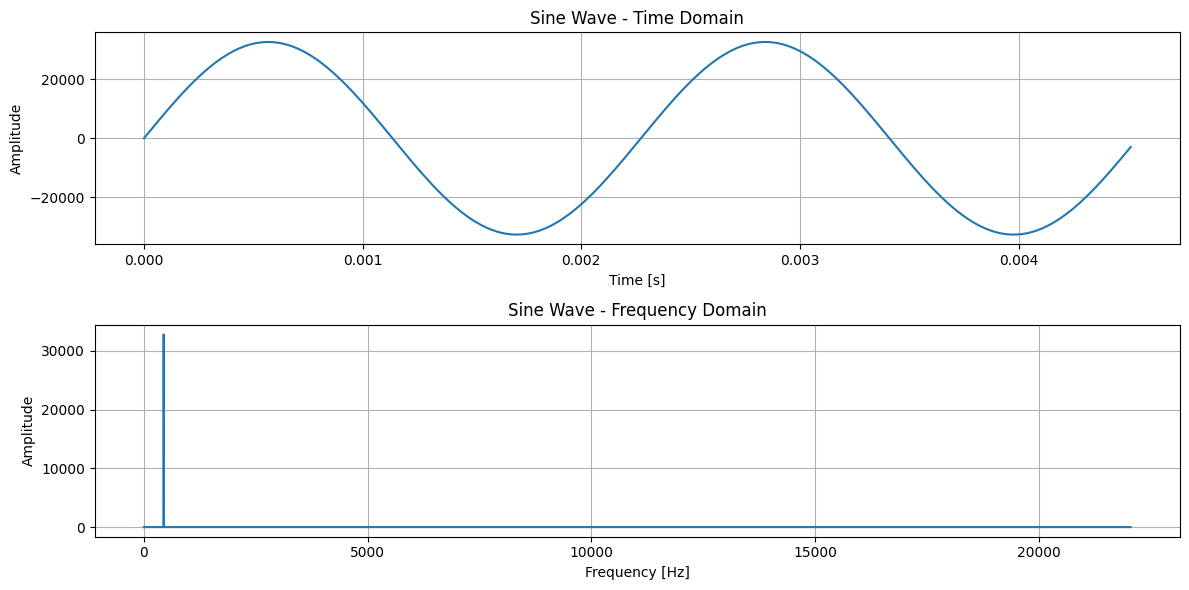

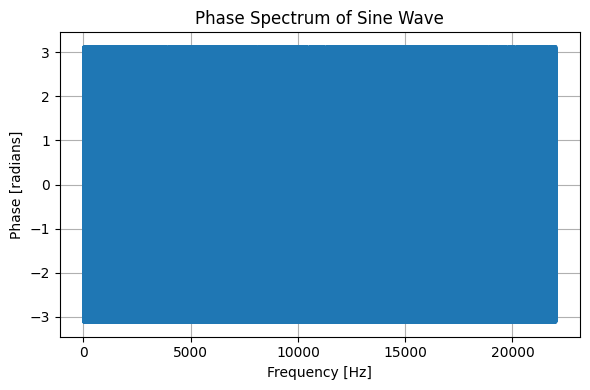

In [12]:
# Plot the sine wave in time domain and frequency domain
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
# Time domain plot
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t[:200], sine_wave[:200])  # Plot first 200 samples
plt.title("Sine Wave - Time Domain")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()

# Frequency domain plot
N = len(sine_wave)
yf = fft(sine_wave)
xf = fftfreq(N, 1 / sample_rate)
plt.subplot(2, 1, 2)
plt.plot(xf[:N // 2], 2.0 / N * np.abs(yf[:N // 2]))  # Plot only positive frequencies
plt.title("Sine Wave - Frequency Domain")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.grid()
plt.tight_layout()
plt.show()

# Plot phase spectrum of the sine wave
plt.figure(figsize=(6, 4))
plt.plot(xf[:N // 2], np.angle(yf[:N // 2]))  # Plot only positive frequencies
plt.title("Phase Spectrum of Sine Wave")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Phase [radians]")
plt.grid()
plt.tight_layout()
plt.show()

Broadband noise file generated: broadband_noise_44100Hz_16bit_1min.wav


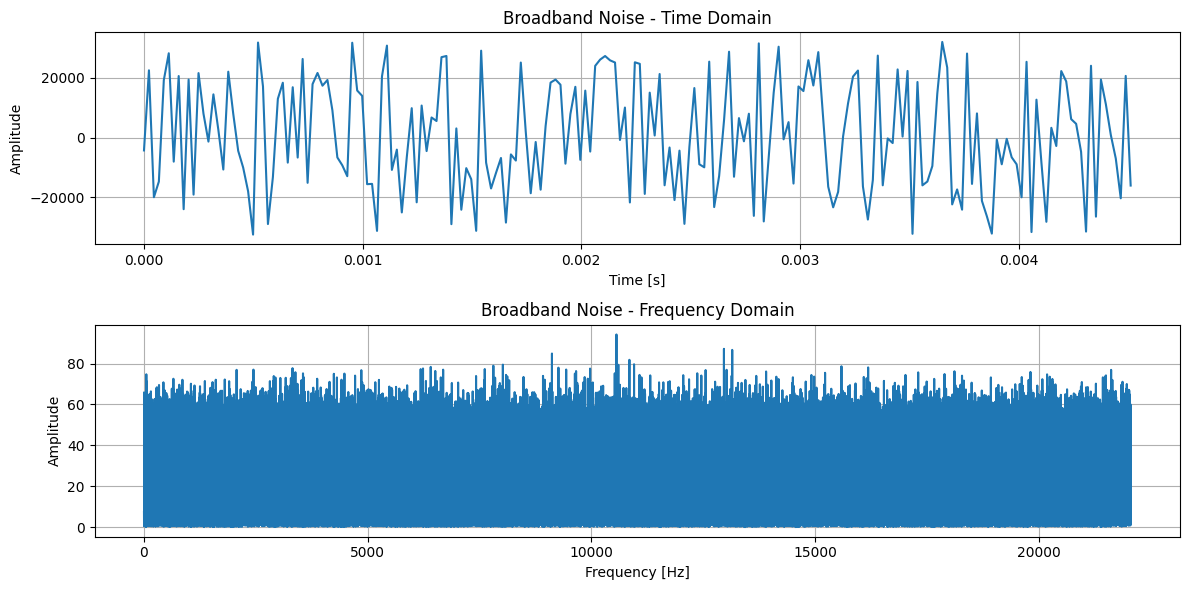

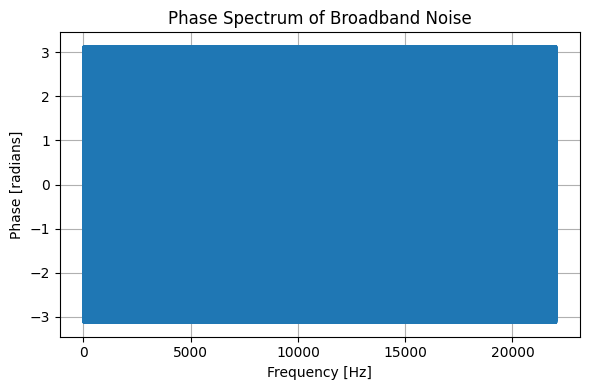

In [13]:
# Generate a broadband noise signal
def generate_broadband_noise(duration, sample_rate):
    noise = np.random.normal(0, 1, int(sample_rate * duration))
    return (amplitude * noise).astype(np.int16)
# Generate broadband noise
broadband_noise = generate_broadband_noise(duration, sample_rate)           
# Write to WAV file
wavFileWriter("Data/broadband_noise_44100Hz_16bit_1min.wav", sample_rate, broadband_noise)
print("Broadband noise file generated: broadband_noise_44100Hz_16bit_1min.wav")
# Plot the broadband noise in time domain and frequency domain
# Time domain plot
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)            
plt.plot(t[:200], broadband_noise[:200])  # Plot first 200 samples
plt.title("Broadband Noise - Time Domain")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()
# Frequency domain plot
N = len(broadband_noise)
yf = fft(broadband_noise)
xf = fftfreq(N, 1 / sample_rate)
plt.subplot(2, 1, 2)
plt.plot(xf[:N // 2], 2.0 / N * np.abs(yf[:N // 2]))  # Plot only positive frequencies
plt.title("Broadband Noise - Frequency Domain")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.grid()
plt.tight_layout()
plt.show()
# Plot phase spectrum of the broadband noise
plt.figure(figsize=(6, 4))
plt.plot(xf[:N // 2], np.angle(yf[:N // 2]))  # Plot only positive frequencies
plt.title("Phase Spectrum of Broadband Noise")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Phase [radians]")
plt.grid()
plt.tight_layout()
plt.show()